# Défi open data : Infrastructures Cyclables

Aujourd’hui, le vélo ne représente que 3% des trajets. Le [**Plan vélo**](https://www.gouvernement.fr/dossier-de-presse/10511-dossier-de-presse-plan-velo), présenté par le Gouvernement en septembre 2018, vise à encourager le développement de ce mode de déplacement en levant les principaux freins identifiés. Il prévoit ainsi des actions réparties en quatre axes, parmi lesquels **l’amélioration de la sécurité routière par le développement d’aménagements cyclables**. L’objectif fixé était ainsi d’atteindre 55 477 km d’aménagements cyclables sécurisés (pistes cyclables et voies vertes) en 2022.

**La problématique du défi**

Pour approfondir le sujet, nous vous proposons de répondre à ces deux questions sous-jacentes :
* **Dans quelle mesure de meilleures infrastructures cyclables diminuent-elles l’accidentologie à vélo ?**
* **Où aménager des infrastructures cyclables pour réduire les accidents à vélo et améliorer la sécurité routière ?**

Beaucoup de données ouvertes sont mises à disposition pour vous permettre de répondre à ce sujet. Plusieurs jeux de données ont déjà été chargés dans cet environnement ([cf. liste](https://defis.data.gouv.fr/defis/65a92352ddd3d98e460e83f3/)) et vous pouvez bien évidemment en ajouter d’autres selon vos besoins.

Une fois vos travaux terminés, partagez-les avec l’ensemble de la communauté [en publiant une réutilisation sur data.gouv.fr](https://guides.data.gouv.fr/guide-data.gouv.fr/reutilisations) !

# Importer des données
Nous mettons à disposition une fonction utilitaire qui permet de charger la majorité des ressources de data.gouv.fr à partir de leur identifiant sur le site (exemple : `"2876a346-d50c-4911-934e-19ee07b0e503"`). Vous pouvez l'utiliser comme suit :

In [1]:
from utils import load_table_from_resource_id

df = load_table_from_resource_id('d5d894b4-b58d-440c-821b-c574e9d6b175')
df

,dateReferentiel,route,longueur,prD,depPrD,concessionPrD,absD,cumulD,xD,yD,...,absF,cumulF,xF,yF,zF,anneeMesureTrafic,typeComptageTrafic,typeComptageTrafic_lib,TMJA,ratio_PL
0,01/01/2019,31D0044,44,0,31,N,0,0,"511656,78","6204078,36",...,44,44,"511698,51","6204063,93",0,NaN,NaN,NaN,NaN,NaN
1,01/01/2019,31D0044E,762,0,31,N,0,0,"511367,22","6204210,06",...,762,762,"511880,76","6203732,4",0,NaN,NaN,NaN,NaN,NaN
2,01/01/2019,69D0301,6055,2,69,N,-981,0,"844036,84","6510806,45",...,71,6055,"849346,89","6509342,34",0,NaN,NaN,NaN,NaN,NaN
3,01/01/2019,69D0383,13752,4,69,N,-494,0,"846831,3","6522372,16",...,544,13752,"843537,87","6512429,8",0,NaN,NaN,NaN,NaN,NaN
4,01/01/2019,69D0383BPNL,2408,0,69,N,0,0,"844982,46","6522772,27",...,413,2408,"846831,3","6522372,16",0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4690,01/01/2019,N1338,2060,8,76,N,0,0,"560104,39","6927892,82",...,960,2060,"559383,28","6929517,35",0,0.0,NaN,NaN,NaN,NaN
4691,01/01/2019,P0224,8995,211,31,N,-638,0,"555988,61","6288880,3",...,344,8995,"562812,02","6287175,9",0,NaN,NaN,NaN,NaN,NaN
4692,01/01/2019,P0524,1777,31,33,N,-768,0,"440252,1","6361052,92",...,1009,1777,"440343,36","6359374,43",0,NaN,NaN,NaN,NaN,NaN
4693,01/01/2019,P0524,3860,31,33,N,1009,1777,"458798,85","6325912,32",...,568,5637,"458785,94","6322872,51",0,NaN,NaN,NaN,NaN,NaN


# Exemple de réalisation : Visualiser les infrastructures cyclables

In [3]:
import requests
import geopandas as gpd

In [9]:
# on récupère la dernière ressource disponible
# PS : la ressource de juin a un problème, on récupère l'avant dernière
resources = requests.get(
    'https://www.data.gouv.fr/api/1/datasets/60a37b7f303fdf4f2654b73d/',
    headers={'X-fields': 'resources{id,title}'}
).json()['resources']
latest = sorted(resources, key=lambda d: d['title'])[-2]
df = load_table_from_resource_id(latest["id"])
df

Info : Ce dataframe contient des données géographiques


,id_local,id_osm,num_iti,code_com_d,ame_d,regime_d,sens_d,largeur_d,local_d,statut_d,...,revet_g,access_ame,date_maj,trafic_vit,lumiere,d_service,source,project_c,ref_geo,geometry
0,geovelo_967104105_65226,967104105,NaN,65226,VOIE VERTE,AUTRE,UNIDIRECTIONNEL,NaN,NaN,EN SERVICE,...,NaN,NaN,2021-07-25,5.0,NaN,NaN,Les contributeurs OpenStreetmap,4326,OpenStreetmap,"LINESTRING (0.03473 43.21868, 0.03492 43.21911..."
1,geovelo_859134545_86210,859134545,NaN,86210,VOIE VERTE,AUTRE,UNIDIRECTIONNEL,NaN,NaN,EN SERVICE,...,NaN,NaN,2020-10-15,5.0,NaN,NaN,Les contributeurs OpenStreetmap,4326,OpenStreetmap,"LINESTRING (0.04840 47.12566, 0.04875 47.12589)"
2,geovelo_35775219_65440,35775219,NaN,65440,BANDE CYCLABLE,NaN,UNIDIRECTIONNEL,NaN,CHAUSSEE,EN SERVICE,...,LISSE,NaN,2023-10-23,NaN,NaN,NaN,Les contributeurs OpenStreetmap,4326,OpenStreetmap,"LINESTRING (0.08481 43.22923, 0.08480 43.22915..."
3,geovelo_1014634280_61001,1014634280,NaN,61001,BANDE CYCLABLE,EN AGGLOMERATION,UNIDIRECTIONNEL,NaN,CHAUSSEE,EN SERVICE,...,NaN,NaN,2021-12-23,50.0,NaN,NaN,Les contributeurs OpenStreetmap,4326,OpenStreetmap,"LINESTRING (0.08728 48.44604, 0.08727 48.44554)"
4,geovelo_111315793_16138,111315793,NaN,16138,BANDE CYCLABLE,NaN,UNIDIRECTIONNEL,NaN,CHAUSSEE,EN SERVICE,...,NaN,NaN,2022-06-28,NaN,NaN,NaN,Les contributeurs OpenStreetmap,4326,OpenStreetmap,"LINESTRING (0.09255 45.66581, 0.09259 45.66579..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314470,geovelo_112397577_29084,112397577,NaN,29084,AUTRE,AUTRE,UNIDIRECTIONNEL,NaN,NaN,EN SERVICE,...,NaN,NaN,2023-08-08,NaN,NaN,NaN,Les contributeurs OpenStreetmap,4326,OpenStreetmap,"LINESTRING (-4.96038 48.39902, -4.96032 48.399..."
314471,geovelo_117738054_29084,117738054,NaN,29084,AUTRE,AUTRE,UNIDIRECTIONNEL,NaN,NaN,EN SERVICE,...,NaN,NaN,2016-07-18,5.0,NaN,NaN,Les contributeurs OpenStreetmap,4326,OpenStreetmap,"LINESTRING (-4.95913 48.40079, -4.95905 48.400..."
314472,geovelo_112397574_29084,112397574,NaN,29084,AUTRE,AUTRE,UNIDIRECTIONNEL,NaN,NaN,EN SERVICE,...,NaN,NaN,2015-11-03,NaN,NaN,NaN,Les contributeurs OpenStreetmap,4326,OpenStreetmap,"LINESTRING (-4.95905 48.40095, -4.95913 48.400..."
314473,geovelo_295455954_29084,295455954,NaN,29084,AUTRE,AUTRE,UNIDIRECTIONNEL,NaN,NaN,EN SERVICE,...,NaN,NaN,2014-08-02,NaN,NaN,NaN,Les contributeurs OpenStreetmap,4326,OpenStreetmap,"LINESTRING (-4.95920 48.40066, -4.95940 48.40028)"


<Axes: >

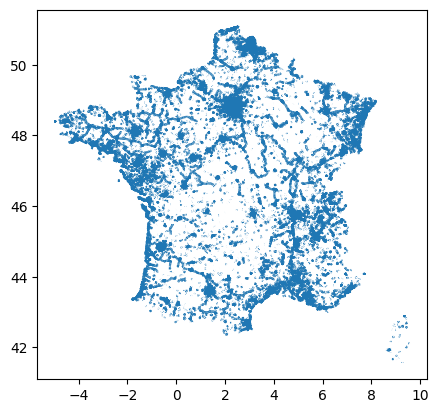

In [9]:
df.plot();